## Decision Tree Regressor

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
from sklearn.datasets import load_diabetes
dataset = load_diabetes()

In [22]:
print(dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [23]:
dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]], shape=(442, 10)),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142.

In [24]:
## Independent features.
X = pd.DataFrame(dataset.data, columns=[
      'age',
      'sex',
      'bmi',
      'bp',
      's1',
      's2',
      's3',
      's4',
      's5',
      's6'
])

In [25]:
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [26]:
y = dataset.target
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [27]:

## Train/ Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [28]:
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.197408,0.198359,0.394903,0.238375,0.192920,-0.128403,0.227110,0.314151,0.351570
sex,0.197408,1.000000,0.108261,0.221914,0.057674,0.180315,-0.379464,0.324882,0.150956,0.193322
bmi,0.198359,0.108261,1.000000,0.356324,0.226047,0.248146,-0.395021,0.412826,0.435505,0.358273
bp,0.394903,0.221914,0.356324,1.000000,0.238295,0.165632,-0.192505,0.249141,0.420236,0.368882
s1,0.238375,0.057674,0.226047,0.238295,1.000000,0.872781,0.006313,0.559626,0.566312,0.356280
s2,0.192920,0.180315,0.248146,0.165632,0.872781,1.000000,-0.265114,0.684840,0.325759,0.315890
s3,-0.128403,-0.379464,-0.395021,-0.192505,0.006313,-0.265114,1.000000,-0.754616,-0.370523,-0.297055
s4,0.227110,0.324882,0.412826,0.249141,0.559626,0.684840,-0.754616,1.000000,0.609983,0.436311
s5,0.314151,0.150956,0.435505,0.420236,0.566312,0.325759,-0.370523,0.609983,1.000000,0.490970
s6,0.351570,0.193322,0.358273,0.368882,0.356280,0.315890,-0.297055,0.436311,0.490970,1.000000


<Axes: >

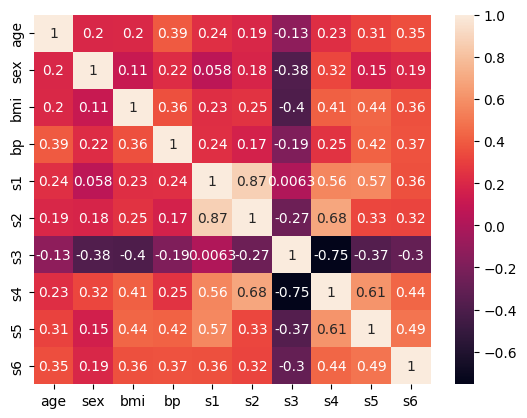

In [29]:
import seaborn as sns
sns.heatmap(X_train.corr(), annot=True)

In [30]:
from sklearn.tree import DecisionTreeRegressor
regressor= DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

[Text(0.6773431338722398, 0.975, 'x[8] <= 0.022\nsquared_error = 5757.456\nsamples = 309\nvalue = 152.738'),
 Text(0.47647008083596215, 0.925, 'x[2] <= 0.005\nsquared_error = 4016.257\nsamples = 205\nvalue = 123.444'),
 Text(0.5769066073541009, 0.95, 'True  '),
 Text(0.37599812697160884, 0.875, 'x[7] <= 0.031\nsquared_error = 2592.764\nsamples = 148\nvalue = 107.615'),
 Text(0.30444104889589907, 0.825, 'x[0] <= 0.022\nsquared_error = 2220.402\nsamples = 127\nvalue = 101.008'),
 Text(0.23999408517350157, 0.775, 'x[3] <= 0.115\nsquared_error = 2062.541\nsamples = 98\nvalue = 93.898'),
 Text(0.23683951104100948, 0.725, 'x[8] <= -0.009\nsquared_error = 1928.519\nsamples = 97\nvalue = 92.639'),
 Text(0.1980481072555205, 0.675, 'x[2] <= 0.003\nsquared_error = 1459.603\nsamples = 78\nvalue = 87.577'),
 Text(0.1948935331230284, 0.625, 'x[3] <= -0.001\nsquared_error = 1312.285\nsamples = 77\nvalue = 86.117'),
 Text(0.1595031545741325, 0.575, 'x[3] <= -0.007\nsquared_error = 1289.903\nsamples = 

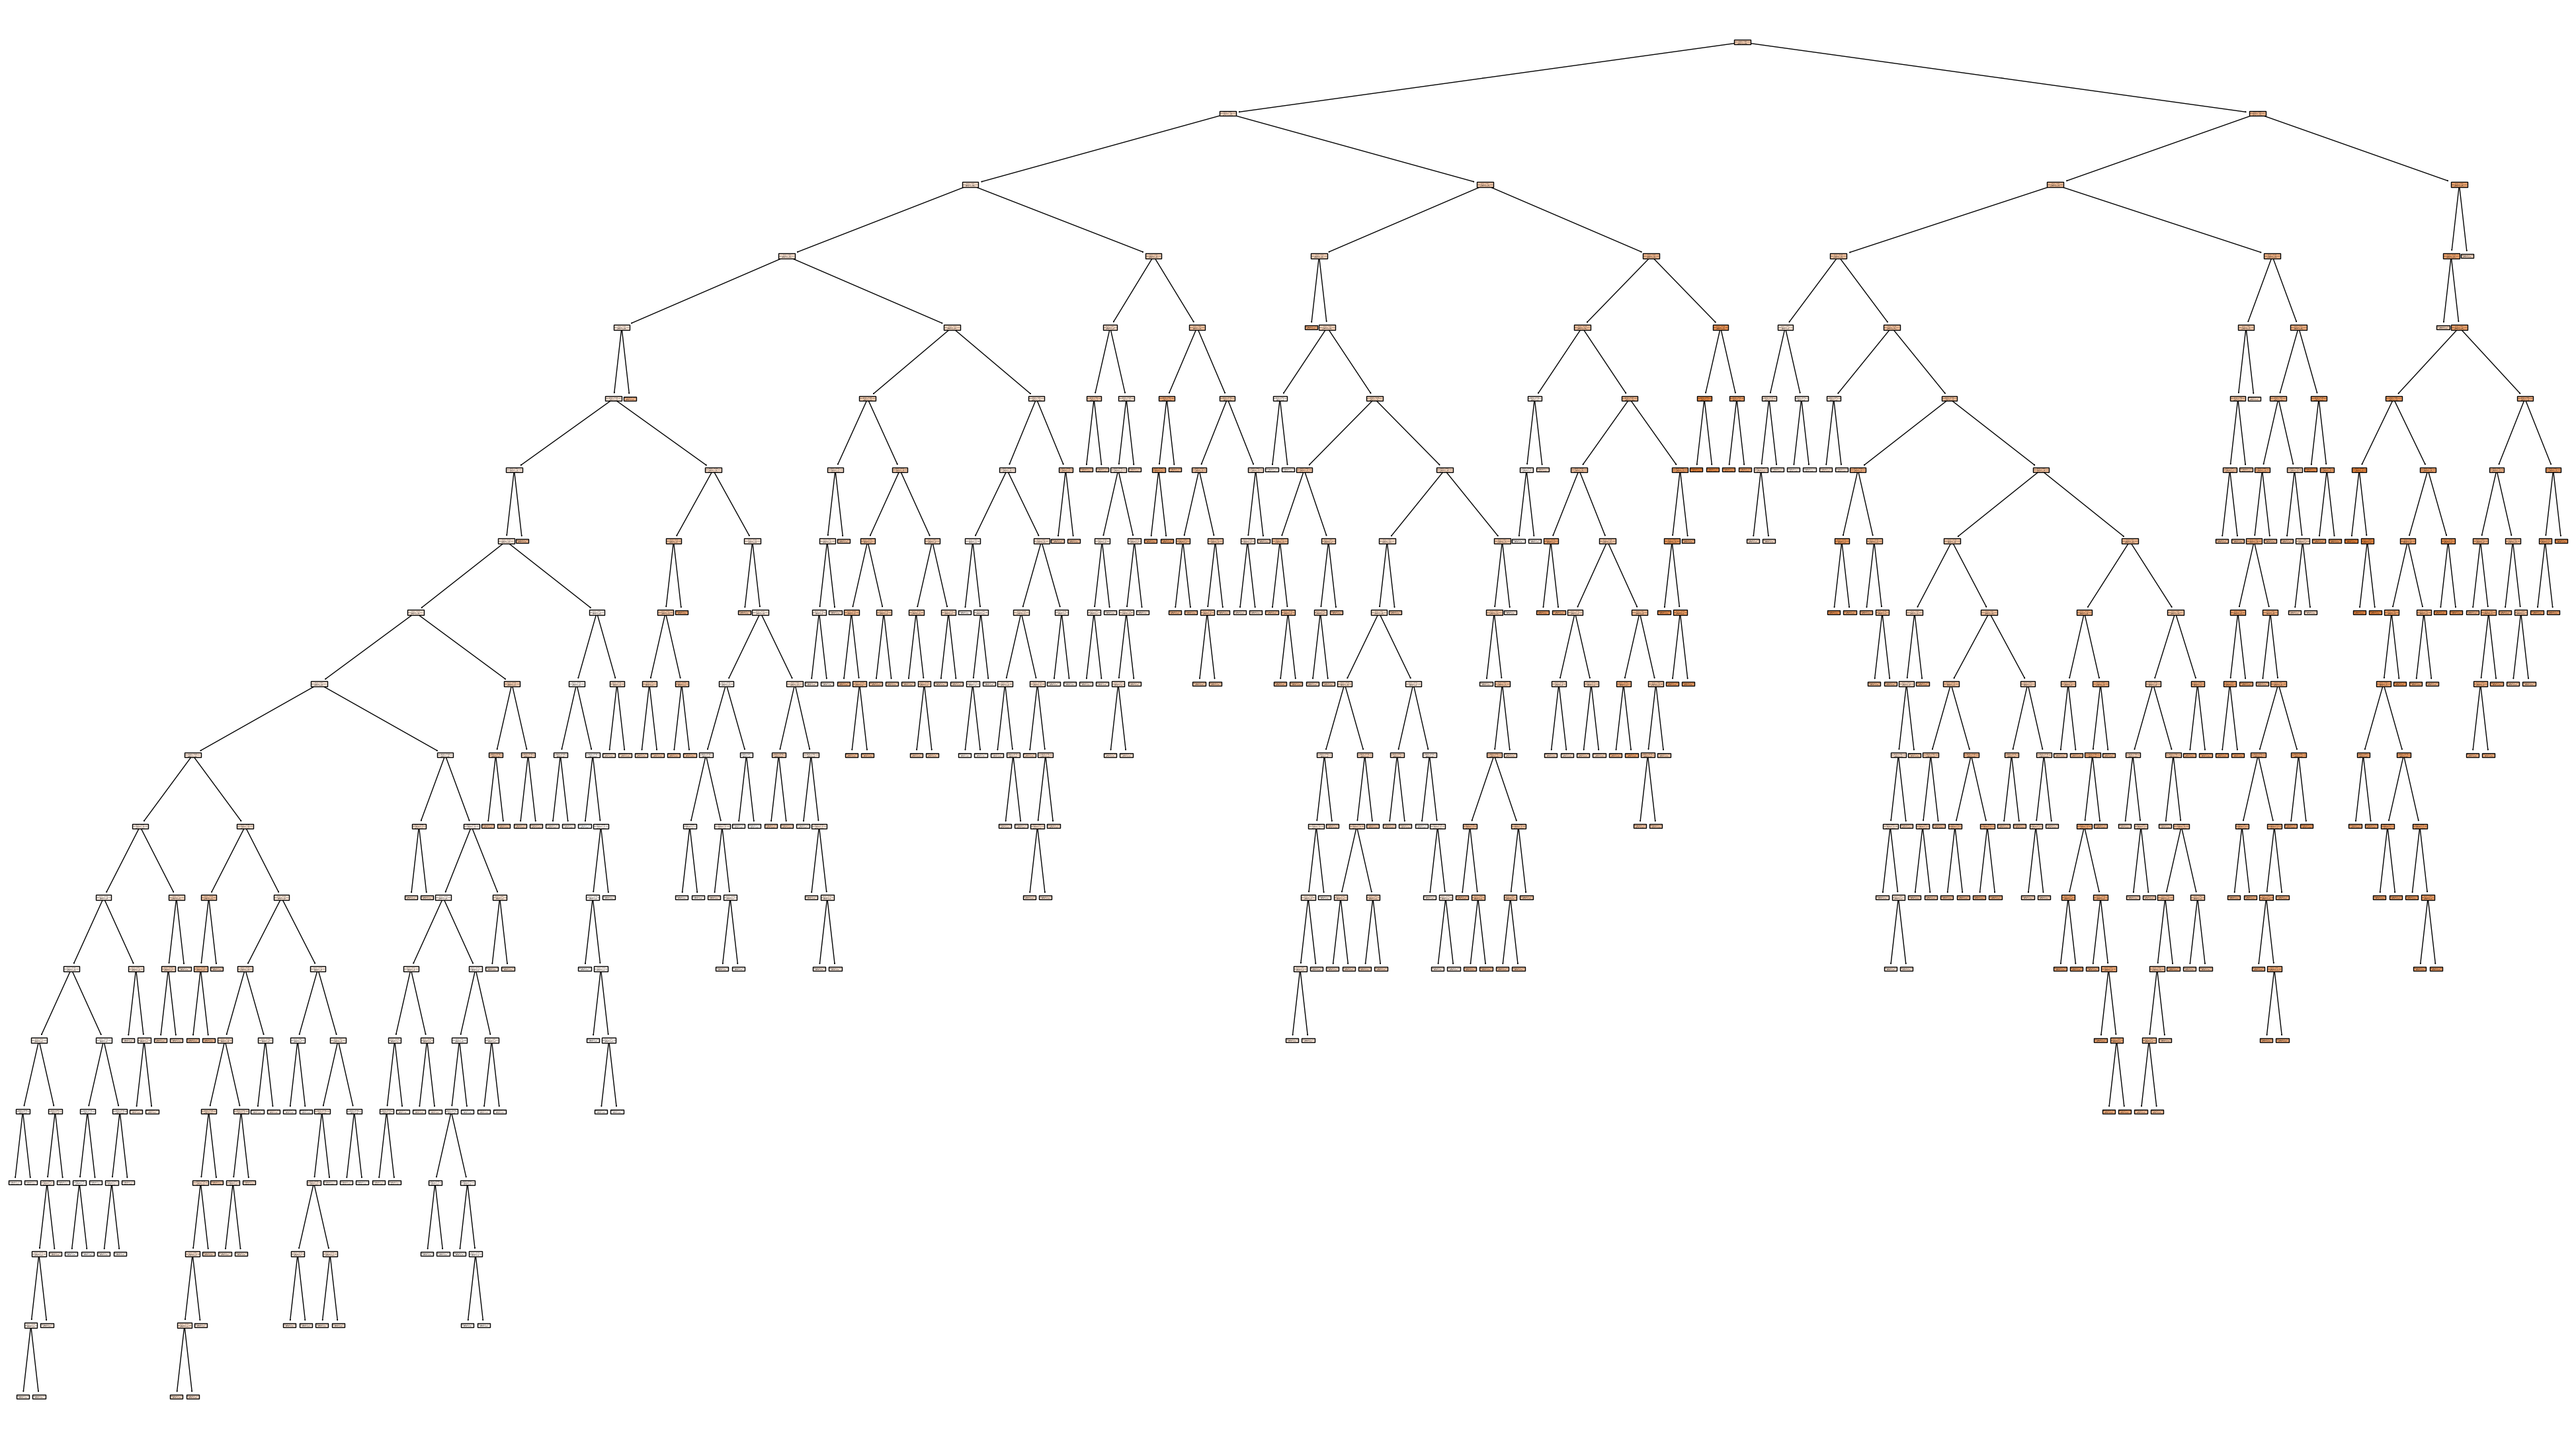

In [36]:
## Visualize the Decision Tree.
from sklearn import tree
plt.figure(figsize=(50, 28))
tree.plot_tree(regressor, filled=True)

In [37]:
y_pred = regressor.predict(X_test)

In [38]:
## Performance Matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(mean_squared_error(y_pred, y_test))
print(mean_absolute_error(y_pred, y_test))
print(r2_score(y_pred, y_test))

7322.285714285715
66.87218045112782
-0.28543954591294196


### Hyperparameter Tuning

In [39]:
param={
    'criterion':['squared_error','friedman_mse','absolute_error'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,10,15,20,25],
    'max_features':['auto','sqrt','log2']
}

from sklearn.model_selection import GridSearchCV

regressor=DecisionTreeRegressor()

grid=GridSearchCV(regressor,param_grid=param,cv=5,scoring='neg_mean_squared_error')

In [40]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [41]:
grid.best_params_

{'criterion': 'absolute_error',
 'max_depth': 2,
 'max_features': 'log2',
 'splitter': 'best'}

In [42]:
## predictions
y_pred=grid.predict(X_test)

In [44]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.3485160846797217
49.17293233082707
4122.375939849624


In [45]:
selectedmodel=DecisionTreeRegressor(criterion='friedman_mse',max_depth=4,max_features='log2',splitter='random')

In [46]:
selectedmodel.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
                      max_features='log2', splitter='random')

In [49]:
y_pred= selectedmodel.predict(X_test)

In [50]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.23519982205884682
56.50912083754461
4839.4039794326545


[Text(0.5267857142857143, 0.9, 'x[8] <= 0.024\nfriedman_mse = 5757.456\nsamples = 309\nvalue = 152.738'),
 Text(0.2857142857142857, 0.7, 'x[8] <= -0.018\nfriedman_mse = 4052.955\nsamples = 209\nvalue = 124.612'),
 Text(0.40625, 0.8, 'True  '),
 Text(0.14285714285714285, 0.5, 'x[3] <= -0.09\nfriedman_mse = 2868.499\nsamples = 111\nvalue = 105.441'),
 Text(0.07142857142857142, 0.3, 'x[2] <= -0.066\nfriedman_mse = 211.25\nsamples = 4\nvalue = 75.5'),
 Text(0.03571428571428571, 0.1, 'friedman_mse = 121.0\nsamples = 2\nvalue = 66.0'),
 Text(0.10714285714285714, 0.1, 'friedman_mse = 121.0\nsamples = 2\nvalue = 85.0'),
 Text(0.21428571428571427, 0.3, 'x[5] <= 0.008\nfriedman_mse = 2933.069\nsamples = 107\nvalue = 106.561'),
 Text(0.17857142857142858, 0.1, 'friedman_mse = 3102.477\nsamples = 80\nvalue = 104.15'),
 Text(0.25, 0.1, 'friedman_mse = 2362.875\nsamples = 27\nvalue = 113.704'),
 Text(0.42857142857142855, 0.5, 'x[2] <= 0.104\nfriedman_mse = 4506.751\nsamples = 98\nvalue = 146.327'),
 

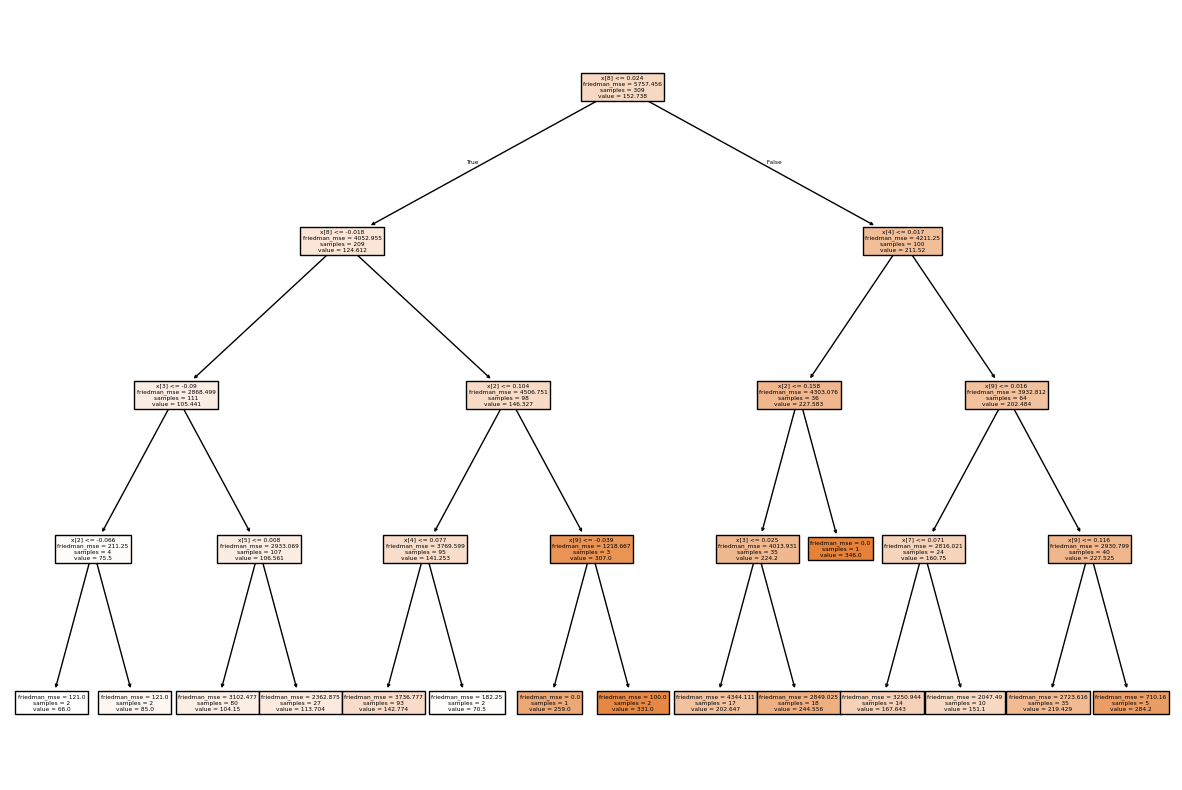

In [47]:

##Visualize the Decision Tree
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(selectedmodel,filled=True)